In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
# website url: http://www.hubertiming.com/results/2017GPTR10K
# download html
url = 'https://www.hubertiming.com/results/2017GPTR10K'
html = urlopen(url)

In [3]:
soup = BeautifulSoup(html, 'html.parser')

In [4]:
# get the individual resutls table
individual_result = soup.find(id='individualResults')
type(individual_result)
print(individual_result)

<table class="table table-striped table-hover ht-table table-responsive-md table-bordered" id="individualResults">
<thead>
<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>00:36:21</td>
<td>05:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>00:00:03</td>
<td>00:36:24</td>
<td></td>
</tr>
<tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:36:42</td>
<td>05:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>00:00:03</td>
<td>00:36:45</td>
<td>INTEL TEAM F</td>
</tr>
<tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:37:44</td>


In [5]:
# get the headers
headers = individual_result.thead
print(headers)

<thead>
<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>
</thead>


In [6]:
# extract text from headers 
headers = headers.find_all('th')
headers = list(map(lambda h: h.text, headers))
print('headers', headers)

headers ['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time', 'Team']


In [7]:
# get each row of the table
rows = individual_result.find_all('tr')
print('There are a total of {} rows in the table'.format(len(rows)))

There are a total of 578 rows in the table


In [8]:
# for each row get the values of the td
table_data = []
for row in rows:
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.text)
    table_data.append(row_data)
    
# create DataFrame
table_df = pd.DataFrame(table_data)
table_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
2,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
3,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
4,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
5,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
6,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,
7,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,00:40:04,06:27,7 of 414,M 36-45,3 of 152,00:00:13,00:40:17,
8,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,00:40:05,06:27,8 of 414,M 36-45,4 of 152,00:00:04,00:40:09,
9,9,7,BRANDON THOMAS,M,,,00:40:17,06:29,9 of 414,M 26-35,3 of 154,00:00:07,00:40:24,COLUMBIA TEAM B


In [9]:
# remove rows with bad data
clean_table = table_df.dropna()
clean_table.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
2,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
3,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
4,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
5,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
6,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,
7,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,00:40:04,06:27,7 of 414,M 36-45,3 of 152,00:00:13,00:40:17,
8,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,00:40:05,06:27,8 of 414,M 36-45,4 of 152,00:00:04,00:40:09,
9,9,7,BRANDON THOMAS,M,,,00:40:17,06:29,9 of 414,M 26-35,3 of 154,00:00:07,00:40:24,COLUMBIA TEAM B
10,10,3,ERIK BJORNSTAD,M,,,00:40:21,06:30,10 of 414,M 36-45,5 of 152,00:00:04,00:40:25,COLUMBIA TEAM A


In [10]:
# set column names for table
clean_table.columns = headers
clean_table.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
1,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
2,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
3,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
4,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
5,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
6,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,
7,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,00:40:04,06:27,7 of 414,M 36-45,3 of 152,00:00:13,00:40:17,
8,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,00:40:05,06:27,8 of 414,M 36-45,4 of 152,00:00:04,00:40:09,
9,9,7,BRANDON THOMAS,M,,,00:40:17,06:29,9 of 414,M 26-35,3 of 154,00:00:07,00:40:24,COLUMBIA TEAM B
10,10,3,ERIK BJORNSTAD,M,,,00:40:21,06:30,10 of 414,M 36-45,5 of 152,00:00:04,00:40:25,COLUMBIA TEAM A


In [11]:
# map chip time to time value
import datetime
chip_time_list = clean_table['Chip Time'].tolist()
chip_times = []
for v in chip_time_list:
    time = datetime.datetime.strptime(v, '%H:%M:%S').time()
    hour = 0 if time.hour is None else time.hour
    minute = 0 if time.minute is None else time.minute
    second = 0 if time.second is None else time.second
    chip_times.append(hour * 60 + minute + (second / 60))
print(type(chip_times))
print('Type of chip time column: ', type(chip_times[0]))

<class 'list'>
Type of chip time column:  <class 'float'>


In [12]:
# replace Chip Time str with Chip Time time
clean_table.insert(7,'Chip Time Mins', chip_times)
clean_table.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Time Mins,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
1,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,36.350000,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
2,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,36.700000,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
3,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,37.733333,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
4,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,38.566667,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
5,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,39.350000,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
6,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,39.816667,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,
7,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,00:40:04,40.066667,06:27,7 of 414,M 36-45,3 of 152,00:00:13,00:40:17,
8,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,00:40:05,40.083333,06:27,8 of 414,M 36-45,4 of 152,00:00:04,00:40:09,
9,9,7,BRANDON THOMAS,M,,,00:40:17,40.283333,06:29,9 of 414,M 26-35,3 of 154,00:00:07,00:40:24,COLUMBIA TEAM B
10,10,3,ERIK BJORNSTAD,M,,,00:40:21,40.350000,06:30,10 of 414,M 36-45,5 of 152,00:00:04,00:40:25,COLUMBIA TEAM A


In [13]:
clean_table.describe(include=[np.number])

,Chip Time Mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x1a29bf12e8>],
 <a list of 1 Text xticklabel objects>)

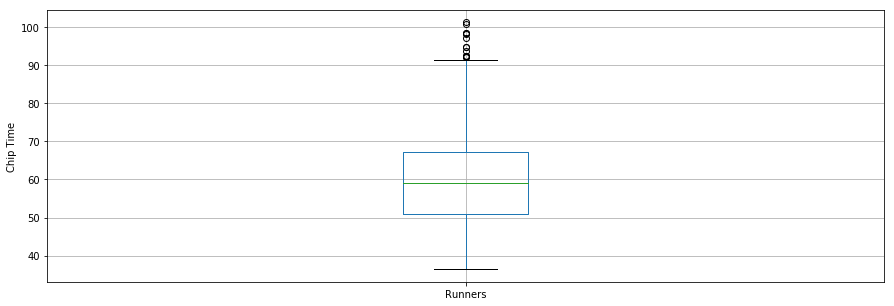

In [14]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 5

clean_table.boxplot(column='Chip Time Mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

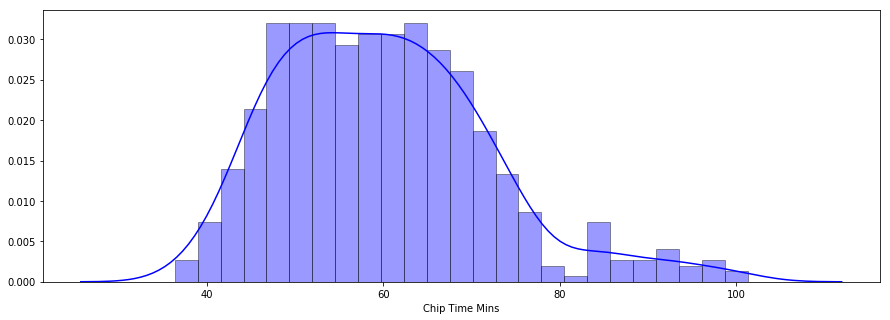

In [15]:
x = clean_table['Chip Time Mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='b', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

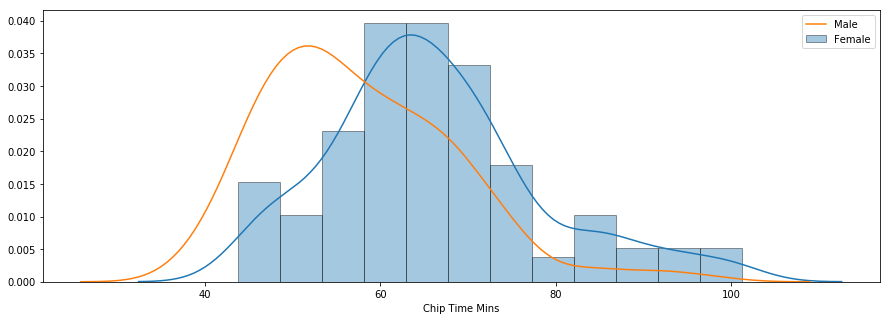

In [16]:
f_fuko = clean_table.loc[clean_table['Gender']=='F']['Chip Time Mins']
m_fuko = clean_table.loc[clean_table['Gender']=='M']['Chip Time Mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [17]:
g_stats = clean_table.groupby('Gender', as_index = True).describe()
print(g_stats)

       Chip Time Mins                                                         \
                count       mean        std        min        25%        50%   
Gender                                                                         
F               163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M               414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
F       72.058333  101.300000  
M       64.804167   98.516667  
